## Sequential Model

In [5]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [8]:
input1 = Input(shape=(5,))

hidden1 = Dense(5, activation='relu')(input1)
hidden2 = Dense(10, activation='relu')(hidden1)
hidden3 = Dense(50, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)

model = Model(inputs=input1, outputs=output)

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_19 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________
None


https://keras.io/visualization/    

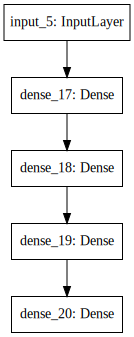

In [10]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Shared Input Layer

In [20]:
# Shared Input Layer

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
input1 = Input(shape=(1,64,64))

conv1 = Conv2D(16, kernel_size=2, activation='relu')(input1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flat1 = Flatten()(pool1)

conv2 = Conv2D(8, kernel_size=4, activation='relu')(input1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])

# Adding hidden layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=input1, outputs=output)

# summarize layers
print(model.summary())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_15 (InputLayer)            (None, 1, 64, 64)     0                                            
____________________________________________________________________________________________________
conv2d_17 (Conv2D)               (None, 16, 63, 63)    80          input_15[0][0]                   
____________________________________________________________________________________________________
conv2d_18 (Conv2D)               (None, 8, 61, 61)     136         input_15[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D)  (None, 16, 31, 31)    0           conv2d_17[0][0]                  
___________________________________________________________________________________________

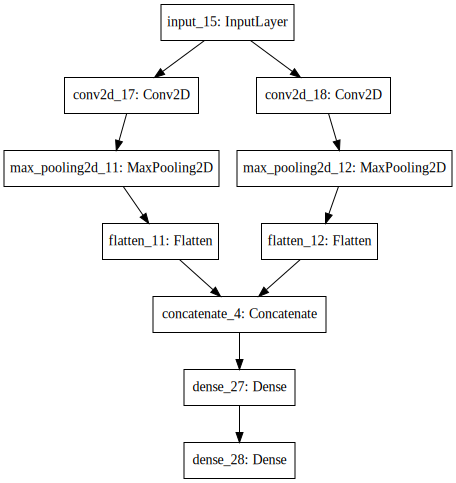

In [21]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Shared Middle Layer


In [22]:
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

# define input
input1 = Input(shape=(100,1))
# feature extraction
extract1 = LSTM(10)(input1)

# first extract
interp1 = Dense(10, activation='relu')(extract1)

# second extract model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)

merge = concatenate([interp1, interp13])

# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=input1, outputs=output)

# summarize layers
print(model.summary())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_16 (InputLayer)            (None, 100, 1)        0                                            
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 10)            480         input_16[0][0]                   
____________________________________________________________________________________________________
dense_30 (Dense)                 (None, 10)            110         lstm_1[0][0]                     
____________________________________________________________________________________________________
dense_31 (Dense)                 (None, 20)            220         dense_30[0][0]                   
___________________________________________________________________________________________

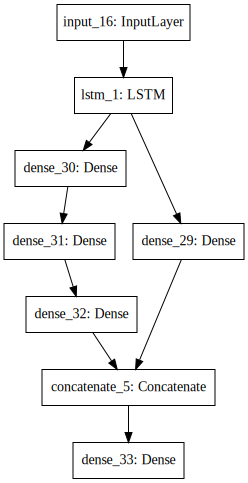

In [23]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Multiple Inputs

In [31]:
# First Input
input1 = Input(shape=(1,64,64))   # B&W image
conv11 = Conv2D(32, kernel_size=4, activation='relu')(input1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# Next Input
input2 = Input(shape=(3,32,32))   # COLOR IMAGE
conv21 = Conv2D(32, kernel_size=4, activation='relu')(input2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])

# Adding Dense layers
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[input1, input2], outputs=output)

# summarize layers
print(model.summary())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_24 (InputLayer)            (None, 1, 64, 64)     0                                            
____________________________________________________________________________________________________
input_25 (InputLayer)            (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
conv2d_30 (Conv2D)               (None, 32, 61, 61)    544         input_24[0][0]                   
____________________________________________________________________________________________________
conv2d_32 (Conv2D)               (None, 32, 29, 29)    1568        input_25[0][0]                   
___________________________________________________________________________________________

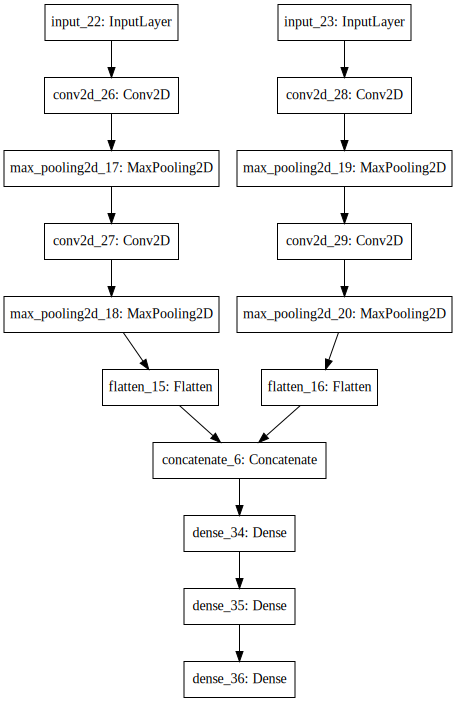

In [29]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))